In [2]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



### Hypothesis Testing

* Recall that:
   * The statistic is the piece of information computed directly on a sample
   * The parameter is somewhat the *opposite* of the statistic and applies to the complete population 

* The goal of a hypothesis test is to select between two competing hypotheses
 * Hypotheses are, in this case, assumptions about a population parameter

* The difference between a parametric and non-parametric method:
  * Parametric methods make assumptions about the parameters and the underlying distributions
  * Non-parametric methods do not make any assumptions about underlying parameters and their distributions


### Hypothesis Testing Questions

* In Hypothesis testing, we tackle:
    1. A measure of the difference between two hypotheses.
        * This is referred to as the `effect size.`
        * E.g.: research has shown that an environmental plan will improve marine diversity in a coastal area
            * The results were statistically significant.
            * How different the diversity will be?            
    2. Probabilities associated with the measured difference 
        * How variable is the measured or inferred difference?
        * How likely is it that the difference is due to chance alone?
        * This is referred to as `p-value.`

### Data In Hypothesis Testing

* An example of a hypothesis test that is commonly used is the t-test.

  * A statistical test that is used to compare the means of two groups. For example:
    * To determine whether a process or treatment actually has an effect on the population of interest,
    * Or whether two groups are different from one another.

E.g.: test whether the oxybenzone and octinoxate often found in sunscreen have an effect on coral calcication

    * Treatment:calcification rate of coral with oxybenzone and octinoxate compounds in the water column
    * Control: calcification rate of coral with not oxybenzone and octinoxate in the water column


### Terminology

* We are typically testing two hypotheses:

  1. The first hypothesis assumes that there is no change in our system 
    * Any changes that we observe are merely due to natural variance in the population
      * Sampling data just looks naturally variable
    * This is referred to as the null hypothesis ($H_0$)
  2. The second hypothesis assumes the differences we are observing across the two samples are not likely to arise due to chance alone
    * By "not likely," we mean something that would be probabilistically rare in occurrence
    * This is referred to as the alternative hypothesis ($H_a$)


### About the Hypothesis tests

* Hypotheses ($H_0$ and $H_a$) are mutually exclusive.
  * If there is a difference, hypothesis testing does not tell us much about the magnitude of the difference 

* A null hypothesis can never be proven to be true
  * Failing to prove that the alternative is true only makes the null plausible. 
  *  We say that we fail to reject the null hypothesis or that the study did not find sufficient evidence to reject the null hypothesis.

* We will say that the results are statistically significant when they are unlikely to be due to chance alone


In [9]:
set.seed(110)
data_1 = tibble(measure=rnorm(40, 10, 1))
data_1$site_name <- 'Site 1'
head(data_1)

measure,site_name
<dbl>,<chr>
10.29120,Site 1
11.38886,Site 1
10.64901,Site 1
11.47788,Site 1
10.43872,Site 1
10.52232,Site 1


In [10]:
## set.seed(110) Why not do this here?
data_2 = tibble(measure=rnorm(35, 10, 1))
data_2$site_name <- 'Site 2'
head(data_2)

measure,site_name
<dbl>,<chr>
9.040858,Site 2
10.664470,Site 2
10.507817,Site 2
9.313609,Site 2
8.959312,Site 2
9.941459,Site 2


In [11]:
complete_data = rbind(data_1, data_2)
head(complete_data)

measure,site_name
<dbl>,<chr>
10.29120,Site 1
11.38886,Site 1
10.64901,Site 1
11.47788,Site 1
10.43872,Site 1
10.52232,Site 1


In [12]:
tail(complete_data)

measure,site_name
<dbl>,<chr>
8.425929,Site 2
9.154771,Site 2
9.525028,Site 2
9.864863,Site 2
10.361634,Site 2
10.233788,Site 2


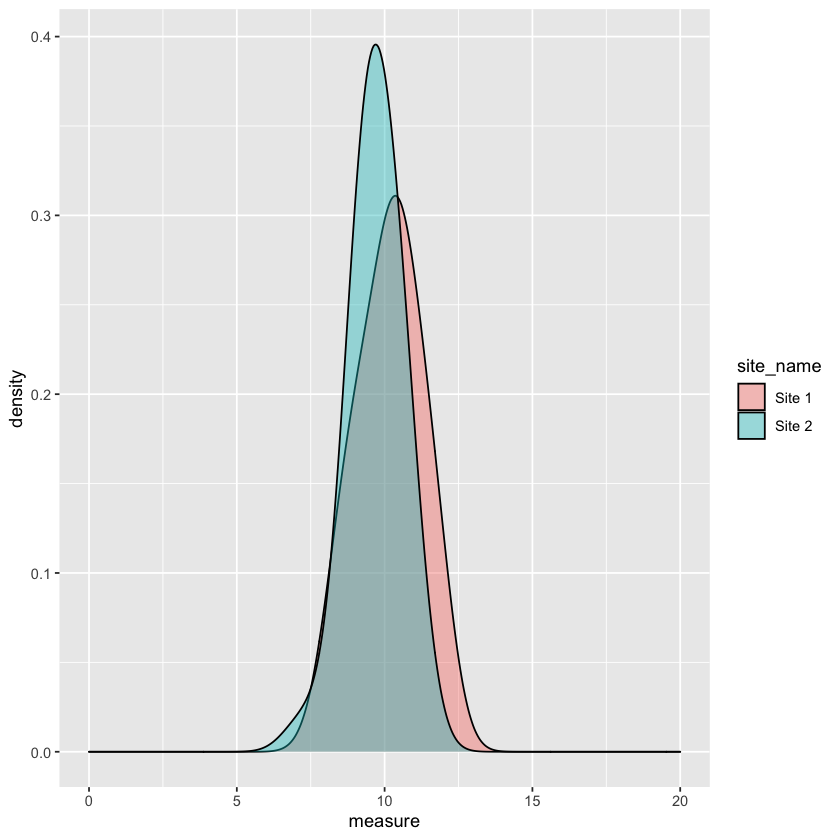

In [13]:
ggplot(complete_data, aes(x=measure, fill = site_name)) + 
  geom_density(alpha = 0.4, bw =0.65) + 
  xlim(0,20)


In [14]:
t.test(data_1$measure, data_2$measure)


	Welch Two Sample t-test

data:  data_1$measure and data_2$measure
t = 2.0806, df = 71.919, p-value = 0.04104
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.01871099 0.87556536
sample estimates:
mean of x mean of y 
10.149792  9.702654 


### Distribution of the Difference in Means

* Under the null hypothesis, all of the data came from the same distribution.
* Note that the t-test above reported data about the difference of the means

* What is the mean of the distribution of the difference between the sample means when the samples are from the same distribution?

  * We answer the question by simulating 
    1. sampling two datasets, each containing 40 samples
    2. Compre their means 
      * compute the difference between the two means
    3. Repeat steps 1 and 3 

In [32]:
data_1 = rnorm(40, 10, 1)
data_2 = rnorm(40, 10, 1)
mean(data_1) - mean(data_2)


[1] 0.4411259

In [34]:
n = 40
n %>% rnorm( 10, 1) %>% mean

[1] 9.230634

In [41]:
getDiffMeans = function(n=40){
    mean_1 = n %>% rnorm(10, 1) %>% mean
    mean_2 = n %>% rnorm(10, 1) %>% mean
    mean_1 - mean_2
}
getDiffMeans()

[1] -0.02836699

In [42]:
getDiffMeans()

[1] 0.2191686

In [43]:
replicate(5, getDiffMeans())

[1]  0.077495193 -0.105100329  0.063362942  0.007522477 -0.100070313

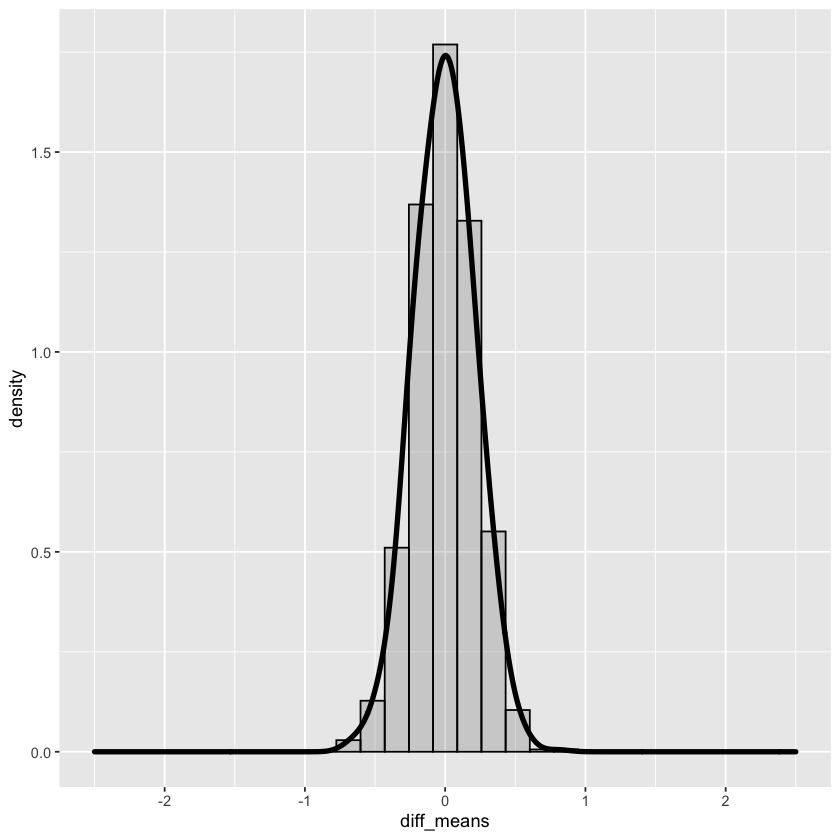

In [50]:
diff_means = replicate(1000, getDiffMeans())
ggplot()+
  geom_histogram(aes(diff_means, y=..density..), bins =30, alpha=0.2, color="black") + 
  geom_density(aes(diff_means), bw=0.08, size=1.5) + 
  xlim(-2.5, 2.5)

### Example: Data From Two Different Distributions

* Suppose the data comes from two different distributions
  * The distributions have means $\mu_1= 10$ and $\mu_2 = 12$
  * The standard deviations are the same for both distributions ($\sigma = 1$)
  

In [328]:
set.seed(110)
data_1 = tibble(measure=rnorm(40, 10, 1))
data_1$site_name <- 'Site 1'
data_2 = tibble(measure=rnorm(40, 14, 1))
data_2$site_name <- 'Site 2'
complete_data = rbind(data_1, data_2)


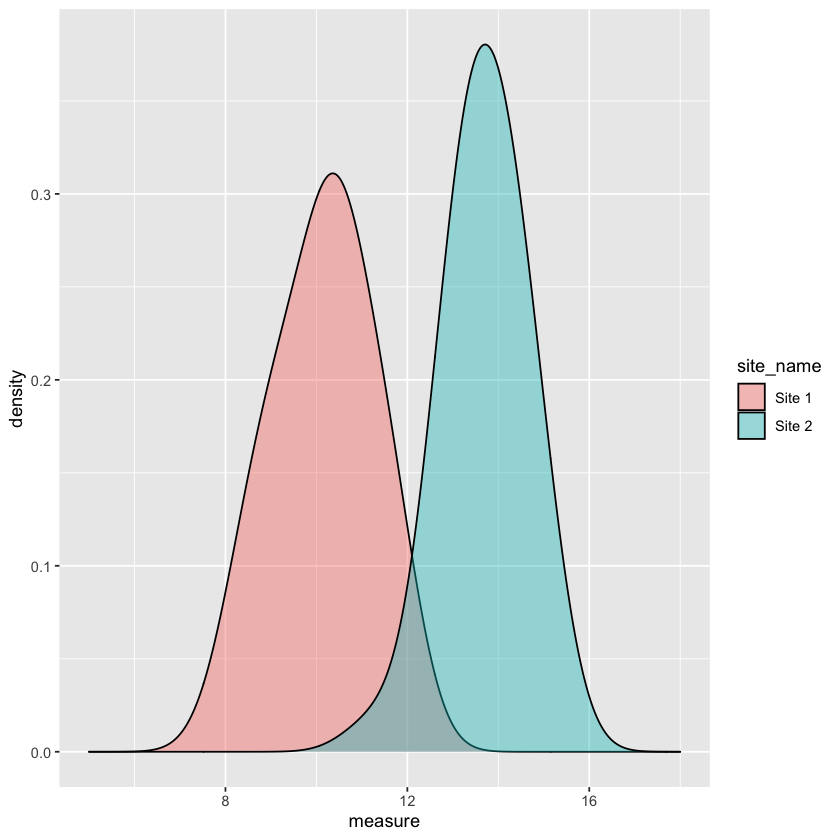

In [329]:
ggplot(complete_data, aes(x=measure, fill = site_name)) + 
  geom_density(alpha = 0.4, bw =0.65) + 
  xlim(5,18)


### Assessing the variability of our statistic - Different Samples

* Recall that our null hypothesis suggests that both datasets come from the same distribution
  * Any observed differences are only due to sampling variability

* The difference between the means is a useful statistic to assess the difference between both samples
  * We call this our observed statistic
  
* We need a distribution of the difference between the two samples to compare our statistic.
  * This is the distribution of the test statistic under the null hypothesis

* We can use the following to generate the background distribution
  * Assume that the null is true, i.e., both samples are from the same distribution
    * How we pick data_1 and data_2 does not matter.
    * Under the null, samples from data_1 and data_2 can be observed
  * Pemute (shufffle) the data and split it into two new datasets: new_data_1 and new_data_2
  * Compute the difference between the new_data_1 and new_data_2
  
  

### Data Permutation Example

![](https://www.dropbox.com/s/i1m3vrwf6fzi9x0/permutation_shuffling.png?dl=1)

In [96]:
# concatenate two vector
a = c(1,2,3)
b = c(4,5,6)
c(a, b)


[1] 1 2 3 4 5 6

In [56]:
# shuffle a vecor
sample(1:5)


[1] 5 3 2 4 1

In [115]:
(split_pos + 1) : length(a)

[1]  5  6  7  8  9 10

In [116]:
# split data

split_pos = 4

a = 1:10

a[1:split_pos]
print("--------")
a[(split_pos + 1) : length(a)]


[1] 1 2 3 4

[1] "--------"


[1]  5  6  7  8  9 10

In [59]:
processOneIter = function(data_1, data_2){
    
    concat_data = c(data_1, data_2)
    len_concat_data = length(concat_data)
    
    len_data_1 = length(data_1)    
    shuffled_data = sample(concat_data)
    new_data_1 = shuffled_data[1:len_data_1]
    new_data_2 = shuffled_data[(len_data_1+1):len_concat_data]
    mean(new_data_1) - mean(new_data_2)
    
}
processOneIter(data_1, data_2)
    

[1] 1.187366

In [123]:
replicate(5, processOneIter(data_1, data_2))

[1]  0.4698903  1.1179944 -0.1709027  0.8876703 -0.4579829

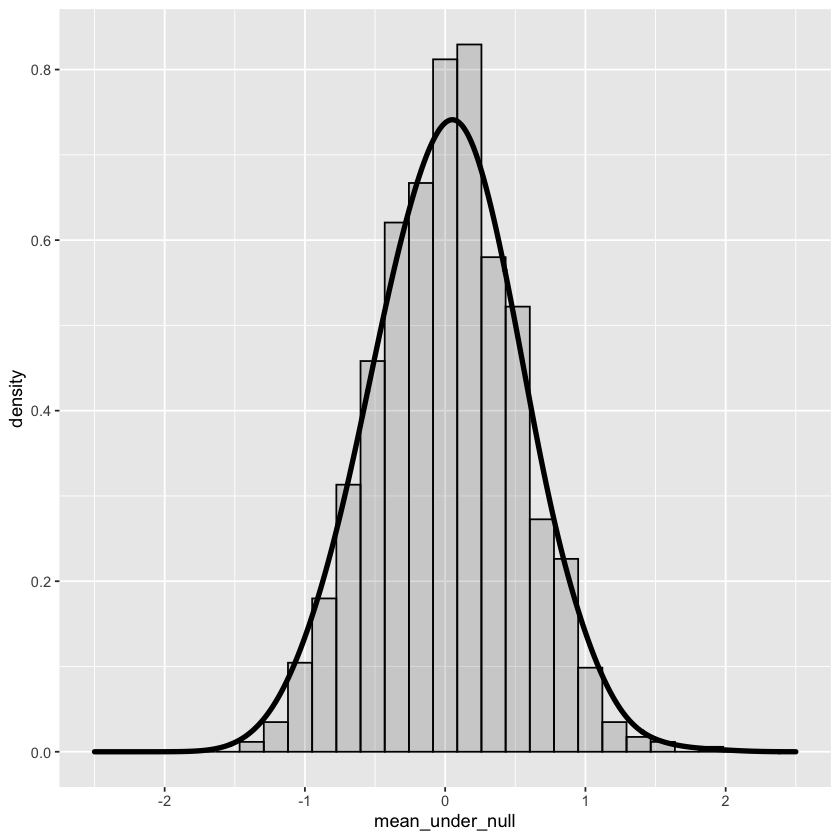

In [129]:
mean_under_null = replicate(1000, processOneIter(data_1, data_2))

ggplot()+
  geom_histogram(aes(mean_under_null, y=..density..), bins =30, alpha=0.2, color="black") + 
  geom_density(aes(mean_under_null), bw=0.2, size=1.5) + 
  xlim(-2.5, 2.5)

### Assessing the variability of our statistic - Different Samples - Cont'd 

* What is the likelihood of observing data, i.e., actual observed difference between the means under the simulated null hypothesis

* This can be estimated empirically as the number of times we saw a mean value as extreme or more extreme than the observed values


In [131]:
observed_value = mean(data_1) - mean(data_2)
observed_value

[1] -4.123477

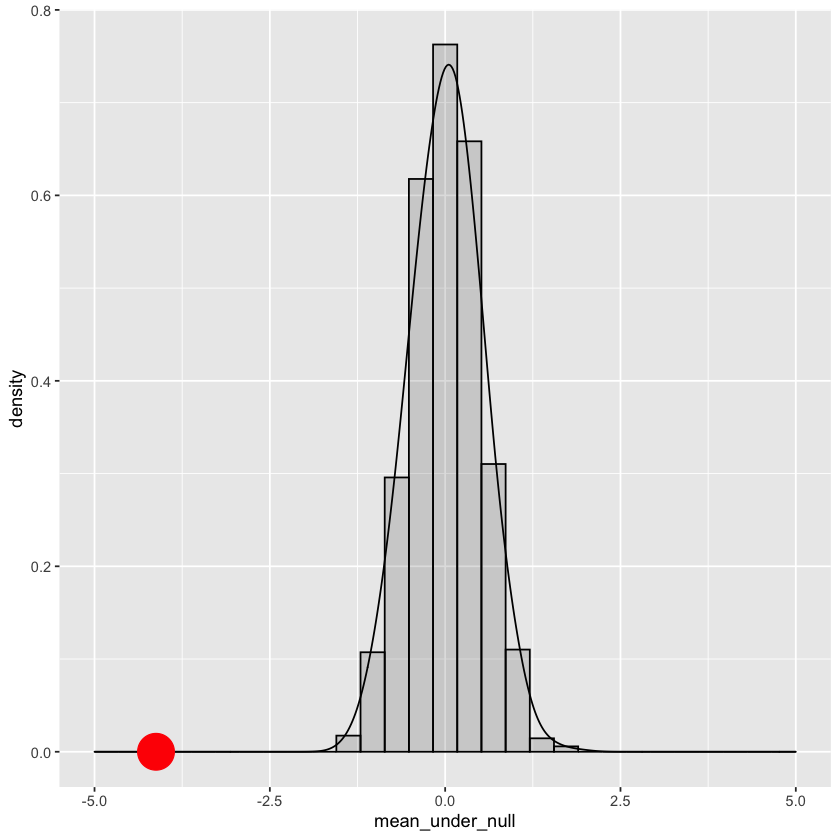

In [157]:
ggplot()+
  geom_histogram(aes(mean_under_null, y=..density..), bins =30, alpha=0.2, color="black") + 
  geom_density(aes(mean_under_null), bw=0.2, size=0.5) + 
  xlim(-5, 5) + 
  geom_point(aes(observed_value, 0), color="red", size=10)


In [134]:
sum(mean_under_null <= observed_value) / length(mean_under_null)

[1] 0

### What have we learned?

* The difference between the means of samples from the same distribution has a mean of 0

* This is very useful for testing the null hypothesis
  * Under the null hypothesis, we assume that the difference between the values observed across two samples is attributed to chance alone 

* Comparing the observed difference between the means of two samples to that obtained if samples are from the same distribution shows how similar/dissimilar the samples are, while accounting for sampling variability


In [175]:
### Comparing Samples from Similar Distributions
set.seed(42)
treatment = rnorm(40, 10, 1)
control = rnorm(40, 10, 1)
mean_under_null = replicate(1000, processOneIter(treatment, control))
observed_value = mean(treatment) - mean(control)
observed_value

[1] -0.1193809

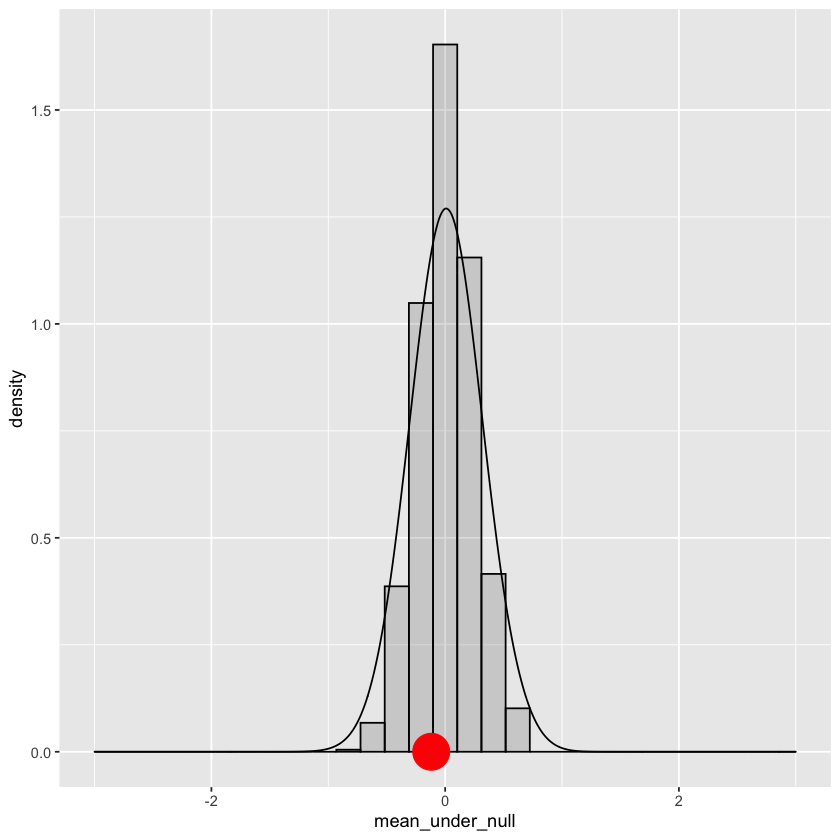

In [176]:
ggplot()+
  geom_histogram(aes(mean_under_null, y=..density..), bins =30, alpha=0.2, color="black") + 
  geom_density(aes(mean_under_null), bw=0.2, size=0.5) + 
  xlim(-3, 3) + 
  geom_point(aes(observed_value, 0), color="red", size=10)

In [177]:
sum(mean_under_null < observed_value) / length(mean_under_null)

[1] 0.289

### How Surprising is an Observed Statistic?

* Out of the 1000 permutations generated, how many were equal to or larger than the observed statistic?
  * We can count the number of simulated statistics that were equal to or larger than -0.119

* The larger that number, the less "surprised" we are by the observed statistic.

* The smaller the number, the less likely that the means of the two samples are the same.

### The P-Value

* The p-value is a convention used to estimate how far out into the tails is considered "surprising"
  * Based on the area in the tail, either upper, lower or both.
     * Since we are working on the empirical distribution, it's easy to compute




### The P-value - Cont'd

The P-value is the chance, based on the model in the null hypothesis, that the test statistic is equal to the value that was observed in the data or is even further in the direction of the alternative.

* If a P-value is small, then the observed statistic is far away from what the null predicts.
  * The null is unlikely and the data supports the alternative
  * Typically, P-value is less than 5%, “statistically significant.”
    * Reasonable to consider that events that occur with a frequency of 1/20 to be surprising 

* The significance level ($\alpha$) is the probability of rejecting the null hypothesis when it is true. 
  * A significance level of 0.05 indicates a 5% risk of concluding that a difference exists when there is no actual difference.
  
  * The concept here is very similar to that of confidence interval


* Fisher  explained its rationale for selectin 0.05 stating:
```
It is usual and convenient for experimenters to take 5 per cent as a standard level of significance, in the sense that they are prepared to ignore all results which fail to reach this standard, and, by this means, to eliminate from further discussion the greater part of the fluctuations which chance causes have introduced into their experimental results.
```

In [ ]:
#### Type I and Type II Errors in T-Test

* Keep in mind that in a population with significant variance, a difference between two samples can occur with chance alone
  * The two distributions do not vary in a meaningful way
  * This can also occur, albeit with much lower probability, in a population with small variance
  
- There are two types of errors that can affect the hypothesis test


### Image form Wikipedia (https://en.wikipedia.org/wiki/Type_I_and_type_II_errors)

![](https://www.dropbox.com/s/9oyf3jv3mkwlz59/type_I_II_errors.png?dl=1)

### About the p-value

![](https://www.dropbox.com/s/g6j1r7zn5p5gv36/p_value.png?dl=1)

### Psychology journal bans P values

* Journal

  * Basic and Applied Social Psychology

* Editors 

  * "Psychologists at New Mexico State University in Las Cruces, say that p-values have become a crutch for scientists dealing with weak data. 
  * “We believe that the p < .05 bar is too easy to pass and sometimes serves as an excuse for lower quality research,” 
  * "Experiments and hypothesis testing had been around for centuries before p-values were invented. “I’d rather not have any inferential statistics at all than have some that we know aren’t valid,” 
  
* Other researchers

  * ""... doesn’t harbour much love for p-values, mostly because they don’t accurately reflect the quality of evidence and can lead to false positives"

  * Many scientists disagree, but the overwhelming feeling is that we should be weary of p-values


### Hypothesis Testing Approach (General Algorithm)

* The strategy used for testing hypotheses will consist of the following steps:

1. We will assume that the null hypothesis is true and will compute some test statistic between the samples, or between the sample and population parameter.
  * Identifying the appropriate statistic is critical 
    * This is the observed statistic under the null hypothesis

2. Use permutations or bootstrapping to build a distribution of the statistic under the null hypothesis
  
3. Use the inferred distribution of the statistic to infer whether the observed statistic is plausible under the null hypothesis
  * How likely are we to observe a value as extreme or more extreme than the observed statistic
  
  


	Welch Two Sample t-test

data:  men_group$height and women_group$height
t = 1.6074, df = 93.73, p-value = 0.1113
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.4164743  3.9563627
sample estimates:
mean of x mean of y 
 174.6109  172.8410 


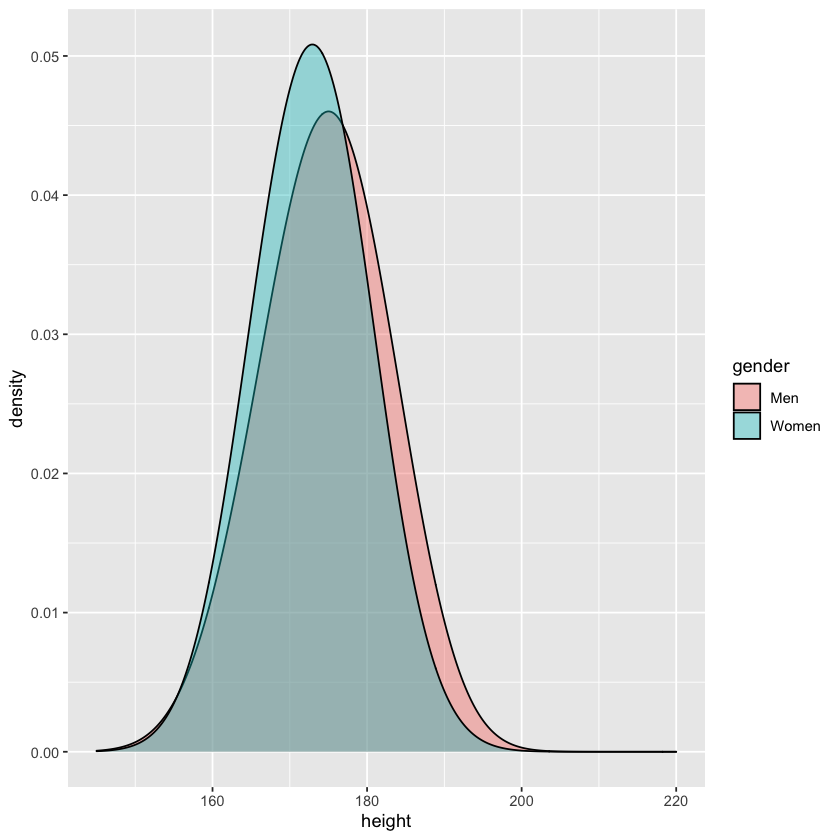

In [202]:
set.seed(10)
men_group = tibble(height= rnorm(50, 177, 7))
men_group$gender = "Men"

women_group = tibble(height= rnorm(50, 172.5, 5))
women_group$gender = "Women"

complete_data = rbind(men_group, women_group)

ggplot(complete_data, aes(x=height, fill = gender)) + 
  geom_density(alpha = 0.4, bw =6) +
  xlim(145, 220)

t.test(men_group$height, women_group$height, ) 

In [204]:
data = t.test(rnorm(50, 177, 7), rnorm(50, 172.5, 5))
str(data)

List of 10
 $ statistic  : Named num 3.72
  ..- attr(*, "names")= chr "t"
 $ parameter  : Named num 93.4
  ..- attr(*, "names")= chr "df"
 $ p.value    : num 0.000338
 $ conf.int   : num [1:2] 2.03 6.67
  ..- attr(*, "conf.level")= num 0.95
 $ estimate   : Named num [1:2] 177 173
  ..- attr(*, "names")= chr [1:2] "mean of x" "mean of y"
 $ null.value : Named num 0
  ..- attr(*, "names")= chr "difference in means"
 $ stderr     : num 1.17
 $ alternative: chr "two.sided"
 $ method     : chr "Welch Two Sample t-test"
 $ data.name  : chr "rnorm(50, 177, 7) and rnorm(50, 172.5, 5)"
 - attr(*, "class")= chr "htest"


In [205]:
data$p.value

[1] 0.000337894

In [208]:
replicate(10, 
    t.test(rnorm(50, 177, 7), rnorm(50, 172.5, 5))$p.value
)  

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

In [209]:
replicate(10, 
    t.test(rnorm(50, 177, 7), rnorm(50, 172.5, 5))$p.value
)  < 0.05

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

In [215]:
passes_t_test = replicate(10000, 
    t.test(rnorm(50, 177, 7), rnorm(50, 172.5, 5))$p.value
)  < 0.05

In [216]:
sum(passes_t_test) / length(passes_t_test)

[1] 0.9552

### Comparing Proportions


* According to studies the compounds butylparaben, octinoxate, benzophenone-3, and 4-methylbenzilydene lead to bleaching in 83% of the corals it was tested on.

* In a recent survey 38 out of 45 corals (84.4) bleached when exposed to these compounds
 
* Can this result be due to sampling alone or does this expirment agree with the observed results

* We are interested in the distance between 83% the reference ratio and the new survey results.
  * Big distances are evidence that the method is causing some difference



### Deciding on the Test Statistic

* We can use the absolute distance between the reference ratio and the ratio obtained from the experiment

$$
∣ 84.4  − 83 ∣ = 1.4%
$$

* Null Hypothesis: there is no difference between sample % of generic drugs sold and 83

  * i.e., the observed difference is merely due to sampling variance

* Alternative Hypothesis: The difference is unlikely to have arisen due to chance alone

In [226]:
model_proportions = c(0.83, 0.17)
data = sample(c("bleached", "healthy"), 45, replace=TRUE, prob=model_proportions)
data

[1] "bleached" "bleached" "bleached" "bleached" "bleached" "bleached"
 [7] "healthy"  "bleached" "bleached" "healthy"  "bleached" "bleached"
[13] "healthy"  "bleached" "healthy"  "bleached" "bleached" "bleached"
[19] "bleached" "bleached" "bleached" "bleached" "bleached" "healthy" 
[25] "bleached" "bleached" "bleached" "bleached" "bleached" "healthy" 
[31] "bleached" "bleached" "healthy"  "bleached" "bleached" "bleached"
[37] "bleached" "bleached" "bleached" "healthy"  "bleached" "healthy" 
[43] "bleached" "bleached" "bleached"

In [230]:
sum(data=="bleached")/length(data)

[1] 0.8

In [237]:
computDiff = function(bleach_prob, healthy, sample_size, ref_bleach_prop){
    model_proportions = c(bleach_prob, healthy)
    data = sample(c("bleached", "healthy"), 45, replace=TRUE, prob=model_proportions)
    abs((sum(data=="bleached")/length(data)) - ref_bleach_prop)
}

computDiff(0.83, 0.17, 45, 0.83)

[1] 0.03666667

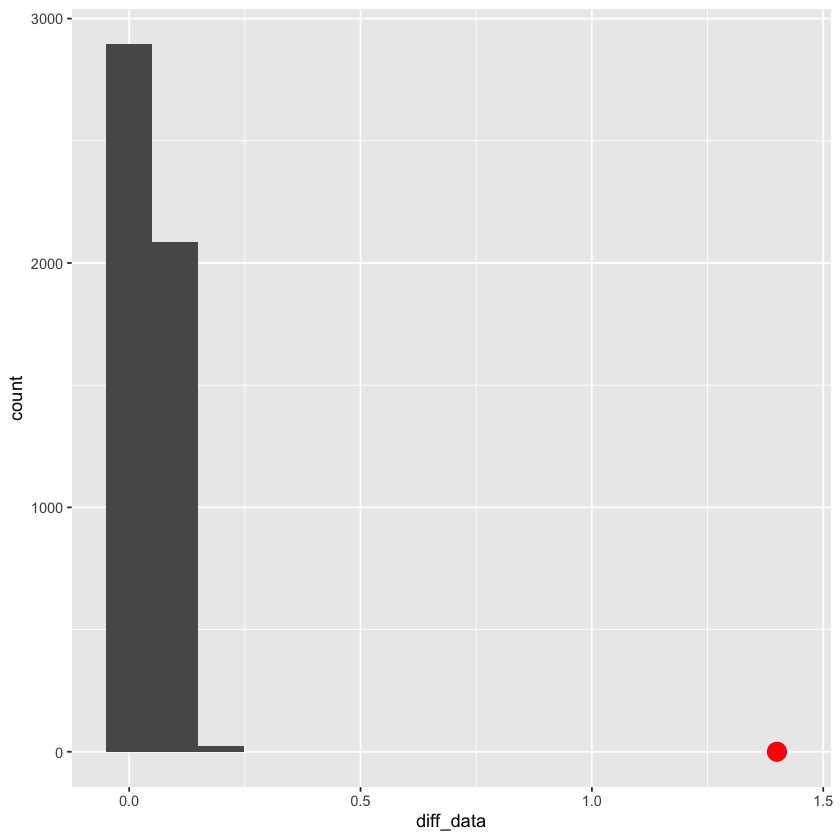

In [245]:
diff_data = replicate(5000, computDiff(0.83, 0.17, 45, 0.83))
ggplot()+
  geom_histogram(aes(diff_data), bins=15)+
  geom_point(aes(1.4, 0), size=5, color = "red")


In [ ]:
### Comparing Multiple Categories

* The method we used in the previous example extends to models with multiple categories

* The approach will be the same as before 

  * The only difference is that we have to come up with a new test statistic 


### New Methods for Estimating Fish Diversity?

* You have a faster, autonomous machine learning-based method of estimating the diversity of fish in a given area

![](https://www.dropbox.com/s/cohr2693y8b8stb/eDNA_fish.png?dl=1)



### New Methods for Estimating Fish Diversity - Cont'd

* Your method can provide ratios for Tilapia, Blenny, Angelfish, Salmon and Other in a pisciculture pond
* you know the true ratios
  * `ratios = c(0.20, 0.08, 0.12,0.54, 0.06)`

* You used your new eDNA test to estimate the ratios.
  * `ratios = c(0.26,0.08, 0.08, 0.54, 0.04)`

* Results are shown in the graph below

In [71]:
kind = c('Tilapia', 'Tilapia', 'Blenny', 'Blenny', 'Angelfish', 'Angelfish', 'Salmon', 'Salmon',  'Other', 'Other')
ratios = c(0.20, 0.26, 0.08, 0.08, 0.12, 0.08, 0.54, 0.54, 0.06, 0.04)
method = rep(c("known", "eDNA"), 5)


fish_proportions = tibble(kind, ratios, method)
fish_proportions

kind,ratios,method
<chr>,<dbl>,<chr>
Tilapia,0.20,known
Tilapia,0.26,eDNA
Blenny,0.08,known
Blenny,0.08,eDNA
Angelfish,0.12,known
Angelfish,0.08,eDNA
Salmon,0.54,known
Salmon,0.54,eDNA
Other,0.06,known


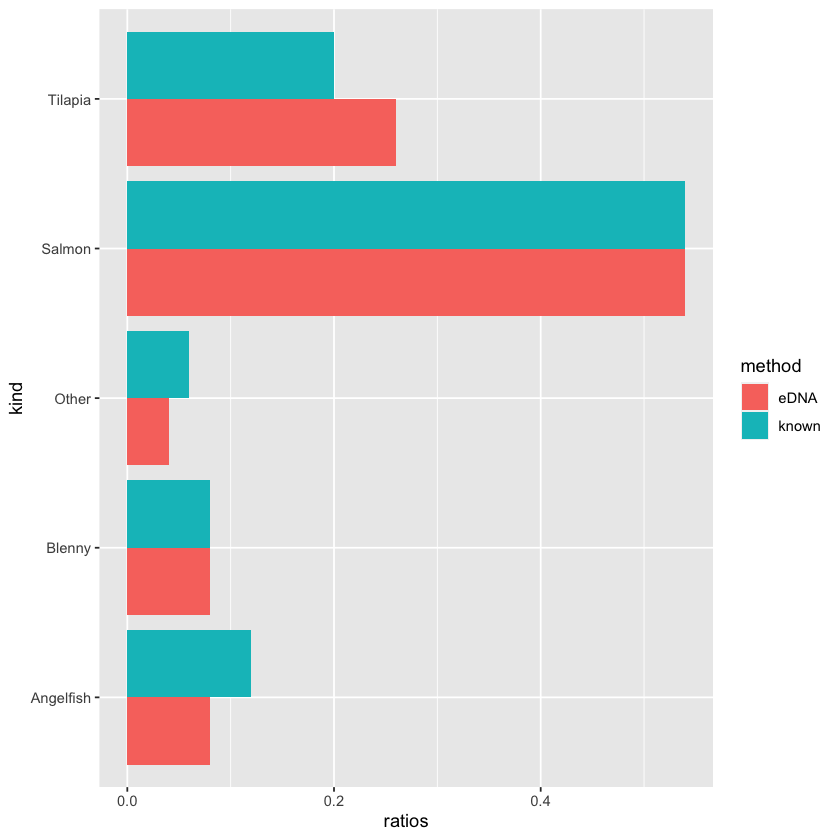

In [72]:
ggplot(fish_proportions, aes(fill=method, y=ratios, x=kind)) + 
    geom_bar(position="dodge", stat="identity") + 
    coord_flip()

### Question

* The distributions look slightly different

* We need to answer the following questions:

  1. What are the null and alternative hypotheses?
  2. What is a useful test statistic for this problem?
  3. How can we generate data following the null hypothesis?


### Null and Alternative Hypotheses

* Our hypotheses are:

  * Null hypothesis: The observed difference between both methods is due to sampling
    * If we were to sample again, we may see an even greater difference
  * Alternative hypothesis: The difference is too big to be due to random chance alone.
    * If we were to sample again, we would rarely, if ever, observe such a difference barplot
    
  * Not that, again, we are not concerned about whether or not one method is over or underestimating a specific fish.
    * We only care about whether or not the method yields equivalent results to counting a large sample manually

### 1. The test statistic

* We can quantify the distance between two distributions using the **total variation distance** 


  * A good test statistic for this problem is on that allows us to quantify the difference between the two distribution


![](https://www.dropbox.com/s/6sbxzuc4fxkuuci/difference.png?dl=1)

In [73]:
subtract = function(x){
    x[1] - x[2]
}

subtract(c(20, 15))

[1] 5

In [74]:
tapply(fish_proportions$ratios, fish_proportions$kind, subtract)

Angelfish    Blenny     Other    Salmon   Tilapia 
     0.04      0.00      0.02      0.00     -0.06

### The Total Variation Distance

* Notice that the sum of the entries for `difference` is 0

  * the positive entries add up to 0.14, exactly canceling the total of the negative entries which is -0.14. 
  
*   
* To avoid numbers cancelling each other, we sum the absolute values and divide by two.

$$
tvd = \frac{1}{2}\sum_{x \in \Omega}|P(x) - Q(x)|,
$$

Where `P` and `Q` are the two probability measure over the sample space $\Omega$

* Other distances but this one is intuitive and fast to compute

In [75]:
subtract_abs = function(x){
    abs(x[1] - x[2])
}


sum(tapply(fish_proportions$ratios, fish_proportions$kind, subtract_abs))/2

[1] 0.06

### Generating Data Under the Null 


* Here again we need to generate some background distribution against which we can compare our test statistic.

* We need to generate some proportion that could have been generated under the null hypothesis

* This approach is similar to how we generate data under the null to test proportions, but we have multiple categories instead of just one.


### The Multionomial Distribution

* The Multinomial generalized the binomial distribution to multiple categories
  * The trials are independent
  * The probability of each outcome across trials is constant
  * The experiment consists of n repeated trials
  * Each trial has a discrete number of possible outcomes (the categories)


In [76]:
# This is equivalent to the multinomial above but returns the outcomes of each trial rather than the outcomes at the end
sample(c('Tilapia', 'Blenny', 'Angelfish', 'Salmon', 'Other'), 200, replace=TRUE, prob=c(0.20, 0.08, 0.12,0.54, 0.06))

[1] "Angelfish" "Salmon"    "Tilapia"   "Salmon"    "Blenny"    "Blenny"   
  [7] "Salmon"    "Salmon"    "Blenny"    "Salmon"    "Tilapia"   "Angelfish"
 [13] "Salmon"    "Salmon"    "Angelfish" "Salmon"    "Salmon"    "Salmon"   
 [19] "Tilapia"   "Salmon"    "Salmon"    "Tilapia"   "Salmon"    "Salmon"   
 [25] "Salmon"    "Tilapia"   "Angelfish" "Salmon"    "Tilapia"   "Salmon"   
 [31] "Salmon"    "Salmon"    "Blenny"    "Tilapia"   "Salmon"    "Other"    
 [37] "Salmon"    "Salmon"    "Angelfish" "Tilapia"   "Tilapia"   "Salmon"   
 [43] "Salmon"    "Salmon"    "Salmon"    "Salmon"    "Angelfish" "Salmon"   
 [49] "Salmon"    "Angelfish" "Blenny"    "Tilapia"   "Salmon"    "Blenny"   
 [55] "Other"     "Salmon"    "Salmon"    "Tilapia"   "Angelfish" "Salmon"   
 [61] "Other"     "Salmon"    "Tilapia"   "Salmon"    "Angelfish" "Tilapia"  
 [67] "Salmon"    "Salmon"    "Salmon"    "Other"     "Salmon"    "Salmon"   
 [73] "Tilapia"   "Salmon"    "Blenny"    "Salmon"    "Salmon"    "Salmon"   
 [79] "Tilapia"   "Angelfish" "Tilapia"   "Salmon"    "Salmon"    "Other"    
 [85] "Salmon"    "Salmon"    "Blenny"    "Salmon"    "Salmon"    "Angelfish"
 [91] "Salmon"    "Salmon"    "Tilapia"   "Salmon"    "Blenny"    "Salmon"   
 [97] "Salmon"    "Salmon"    "Salmon"    "Angelfish" "Angelfish" "Tilapia"  
[103] "Angelfish" "Salmon"    "Salmon"    "Tilapia"   "Salmon"    "Salmon"   
[109] "Blenny"    "Salmon"    "Salmon"    "Salmon"    "Salmon"    "Blenny"   
[115] "Salmon"    "Salmon"    "Salmon"    "Angelfish" "Salmon"    "Salmon"   
[121] "Tilapia"   "Salmon"    "Angelfish" "Tilapia"   "Blenny"    "Blenny"   
[127] "Salmon"    "Other"     "Salmon"    "Salmon"    "Salmon"    "Salmon"   
[133] "Other"     "Salmon"    "Salmon"    "Other"     "Salmon"    "Salmon"   
[139] "Tilapia"   "Tilapia"   "Salmon"    "Salmon"    "Other"     "Tilapia"  
[145] "Salmon"    "Blenny"    "Salmon"    "Tilapia"   "Salmon"    "Salmon"   
[151] "Salmon"    "Salmon"    "Salmon"    "Blenny"    "Angelfish" "Tilapia"  
[157] "Tilapia"   "Angelfish" "Tilapia"   "Salmon"    "Salmon"    "Blenny"   
[163] "Salmon"    "Salmon"    "Salmon"    "Salmon"    "Angelfish" "Tilapia"  
[169] "Salmon"    "Tilapia"   "Salmon"    "Angelfish" "Salmon"    "Salmon"   
[175] "Salmon"    "Tilapia"   "Salmon"    "Salmon"    "Angelfish" "Salmon"   
[181] "Salmon"    "Tilapia"   "Blenny"    "Blenny"    "Salmon"    "Salmon"   
[187] "Salmon"    "Other"     "Angelfish" "Angelfish" "Salmon"    "Salmon"   
[193] "Salmon"    "Tilapia"   "Salmon"    "Tilapia"   "Salmon"    "Salmon"   
[199] "Tilapia"   "Salmon"

In [77]:
rmultinom(1, 200, prob=c(0.20, 0.08, 0.12,0.54, 0.06))

42
20
27
98
13


In [78]:
rmultinom(1, 200, prob=c(0.20, 0.08, 0.12,0.54, 0.06))/200

0.235
0.105
0.135
0.480
0.045


### Simulating the Hypothesis Test

* Given the sample proportions, what is the sampling distribution of the `tvd`

1. generate a random sample using the multinomial distributions and the observed proportions
2. Compute and store the sample `tvd` to build the background distribution
3. Compare the observed value against the data simulated under the null hypothesis

In [80]:
sampleOneIteration = function(){
    true_proportions = c(0.20, 0.08, 0.12,0.54, 0.06)
    sample_proportions = rmultinom(1, 200, prob=c(0.20, 0.08, 0.12,0.54, 0.06))/200
    sample_tvd = sum(abs(true_proportions- sample_proportions))/2
    sample_tvd
        
}
sampleOneIteration()

[1] 0.01

In [81]:
tvds = replicate(1000, sampleOneIteration())

In [82]:
observed_stat = sum(tapply(fish_proportions$ratios, fish_proportions$kind, subtract_abs))/2

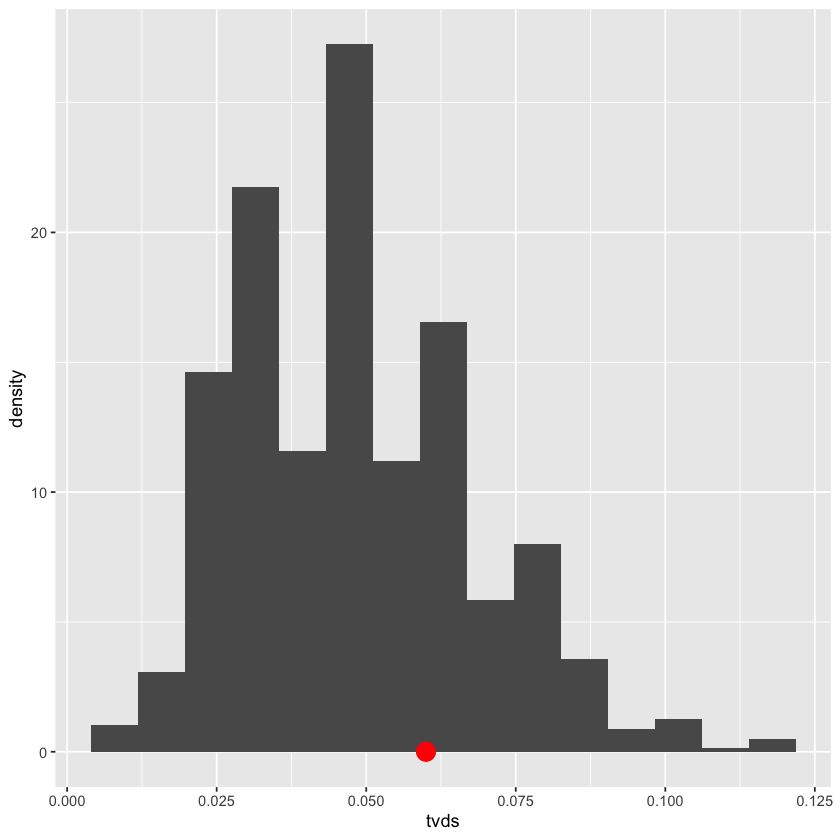

In [83]:

ggplot()+ 
  geom_histogram(aes(tvds, ..density..), bins = 15) +
  geom_point(aes(observed_stat, 0), size=5, color="red")


In [317]:
p_value = sum(tvds > observed_stat)  / length(tvds)
p_value

[1] 0.237